In [ ]:
# installation
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# interaction
! kaggle datasets download andrewmvd/face-mask-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip face-mask-detection.zip -d face-mask-detection

unzip:  cannot find or open face-mask-detection.zip, face-mask-detection.zip.zip or face-mask-detection.zip.ZIP.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

In [ ]:
import xml.etree.ElementTree as ET

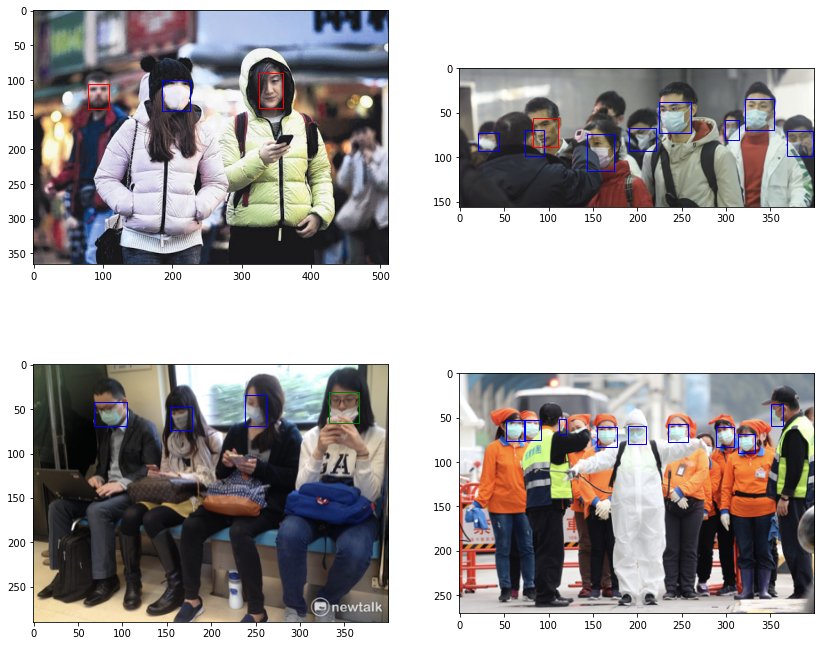

In [ ]:
number = 2
fig, axs = plt.subplots(2, 2)

fig.set_figheight(6 * number)
fig.set_figwidth(7 * number)

i = 0

for row in range(number):
  for col in range(number):

    # read the png file
    img = mpimg.imread('/content/images/maksssksksss' + str(i) + '.png')

    # parse the xml file
    tree = ET.parse('/content/annotations/maksssksksss' + str(i) + '.xml')
    root = tree.getroot()

    for object in root.iter('object'):
        # name of the bounding box
        name = object[0].text

        # coordinates of the bounding box
        xmin = int(object[5][0].text)
        ymin = int(object[5][1].text)
        xmax = int(object[5][2].text)
        ymax = int(object[5][3].text)

        # classification 
        if name == 'with_mask': 
          color = 'b'
        if name == 'without_mask':
          color = 'r'
        if name == 'mask_weared_incorrect' :
          color = 'g'
        
        # visualization
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor = color, facecolor='none')
        axs[row, col].add_patch(rect)
        axs[row, col].imshow(img)

    i += 1

plt.show()

Label distribution

115
3232
123
717


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


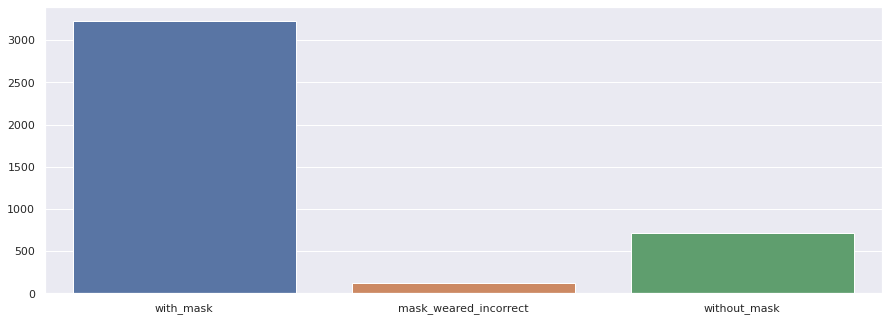

In [ ]:
import os
import seaborn as sns

y_axis = [0, 0, 0]
count = []
aspect_ratio = []

for index in range(len(os.listdir('/content/annotations')) - 1):
  tree = ET.parse('/content/annotations/maksssksksss' + str(index) + '.xml')
  root = tree.getroot()
  i = 0 

  for size in root.iter('size'):
    width = float(size[0].text)
    length = float(size[1].text)
    aspect_ratio.append(width/length)

  for object in root.iter('object'):
      # name of the bounding box
      name = object[0].text
      i += 1

      if name == 'with_mask':
        y_axis[0] += 1
      if name == 'mask_weared_incorrect':
        y_axis[1] += 1
      if name == 'without_mask':
        y_axis[2] += 1

  count.append(i)
  if count[index] > 100 :
    print(count[index])

print(y_axis[0])
print(y_axis[1])
print(y_axis[2])
sns.set_theme(style="darkgrid")
sns.barplot(['with_mask', 'mask_weared_incorrect', 'without_mask'], y_axis)

Number of detections per image

In [ ]:
print("Max freq:", max(count))
print("Min freq:", min(count))

Max freq: 115
Min freq: 1


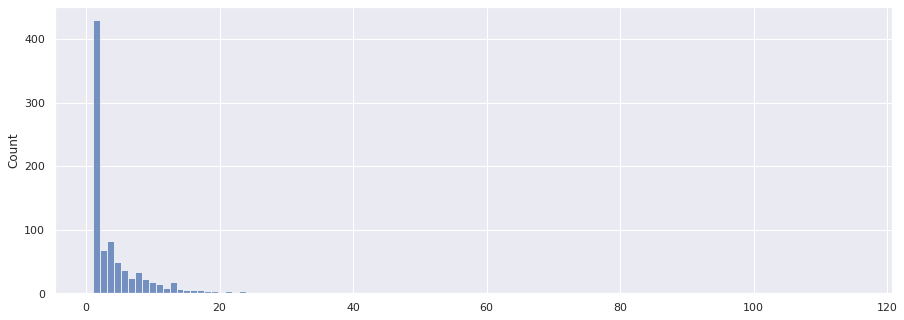

In [ ]:
sns.set(rc={'figure.figsize':(15,5.27)})
sns.histplot(count)

Aspect Ratio distribution

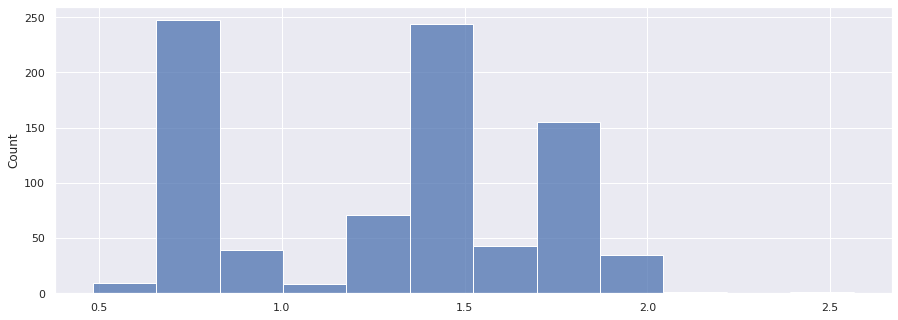

In [ ]:
sns.set(rc={'figure.figsize':(15,5.27)})
sns.histplot(aspect_ratio)